In [1]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.optimizers import SGD
from keras_tuner import RandomSearch

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

import keras_tuner as kt

### For multiclass classification we labeled the datasets A, B, C, D and E as '0', '1','2', '3',and '4', resepctively. We used SVM model and LSTM model to classify the dataset

In [2]:
# We Labeled the datasets A, B, C, D and E as '0', '1','2', '3',and '4', resepctively
# DataA
pathA = r'H:/Final_project/Data/merged/A' 
all_filesA = glob.glob(pathA + "/*.csv")

tempA = []

for filename in all_filesA:
    df1 = pd.read_csv(filename, index_col=None, header=0)
    tempA.append(df1)

dfA = pd.concat(tempA, axis=0, ignore_index=True)
dfA.insert(loc=len(dfA.columns), column='Y', value='0', allow_duplicates=True)


# DataB
pathB = r'H:/Final_project/Data/merged/B' 
all_filesB = glob.glob(pathB + "/*.csv")

tempB = []

for filename in all_filesB:
    df2 = pd.read_csv(filename, index_col=None, header=0)
    tempB.append(df2)

dfB = pd.concat(tempB, axis=0, ignore_index=True)
dfB.insert(loc=len(dfB.columns), column='Y', value='1', allow_duplicates=True)

# DataC
pathC = r'H:/Final_project/Data/merged/C'
all_filesC = glob.glob(pathC + "/*.csv")

tempC = []

for filename in all_filesC:
    df3 = pd.read_csv(filename, index_col=None, header=0)
    tempC.append(df3)

dfC = pd.concat(tempC, axis=0, ignore_index=True)
dfC.insert(loc=len(dfC.columns), column='Y', value='2', allow_duplicates=True)


## Data D
pathD = r'H:/Final_project/Data/merged/D' 
all_filesD = glob.glob(pathD + "/*.csv")

tempD = []

for filename in all_filesD:
    df4 = pd.read_csv(filename, index_col=None, header=0)
    tempD.append(df4)

dfD = pd.concat(tempD, axis=0, ignore_index=True)
dfD.insert(loc=len(dfD.columns), column='Y', value='3', allow_duplicates=True)


## Data E
pathE = r'H:/Final_project/Data/merged/E' 
all_filesE = glob.glob(pathE + "/*.csv")

tempE = []

for filename in all_filesE:
    df5 = pd.read_csv(filename, index_col=None, header=0)
    tempE.append(df5)

dfE = pd.concat(tempE, axis=0, ignore_index=True)
dfE.insert(loc=len(dfE.columns), column='Y', value='4', allow_duplicates=True)

In [3]:
df = pd.concat([dfA, dfB,dfC,dfD,dfE], ignore_index=True)

The number of samples for the class 0 is: 2300
The number of samples for the class 1 is: 2300
The number of samples for the class 2 is: 2300
The number of samples for the class 3 is: 2300
The number of samples for the class 4 is: 2300


C:\Users\kau19001\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


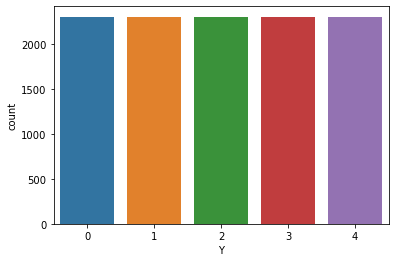

In [4]:
import seaborn as sn
tgt=df["Y"]
tgt= tgt.astype('int')
ax = sn.countplot(tgt, label="Count")
class0 = np.count_nonzero(tgt == 0)
class1 = np.count_nonzero(tgt == 1) 
class2 = np.count_nonzero(tgt == 2) 
class3 = np.count_nonzero(tgt == 3) 
class4 = np.count_nonzero(tgt == 4) 

print('The number of samples for the class 0 is:', class0)
print('The number of samples for the class 1 is:', class1)
print('The number of samples for the class 2 is:', class2)
print('The number of samples for the class 3 is:', class3)
print('The number of samples for the class 4 is:', class4)

In [5]:
target=df["Y"]
target = target.astype('int')
df2=df.drop(["Y"],axis=1)

In [6]:
# feature extraction using wavelet transform
import pywt
def getWaveletFeatures(data,target):
    list_features = []
    for signal in range(len(data)):
        list_coeff = pywt.wavedec(data.iloc[signal], "db4")
        features = []
        for coeff in list_coeff:
            features += statisticsForWavelet(coeff)
        list_features.append(features)
    return createDfWavelet(list_features,target)

def statisticsForWavelet(coefs):
    median = np.nanpercentile(coefs, 50)
    mean = np.nanmean(coefs)
    std = np.nanstd(coefs)
    var = np.nanvar(coefs)
    rms = np.nanmean(np.sqrt(coefs**2))
    return [median, mean, std, var, rms]

def createDfWavelet(data,target):
    for i in range(len(data)):
        data[i].append(target[i])
    return pd.DataFrame(data) 

In [7]:
df2_fea=getWaveletFeatures(df2,target)
df2_fea = shuffle(df2_fea)
df2_fea.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
1703,75.974936,109.819714,105.946251,11224.608098,117.284145,6.361964,14.819627,65.887827,4341.205791,52.886528,...,-0.407655,18.606307,346.194645,14.467049,0.557550,0.326673,3.667627,13.451485,2.917979,0
4466,-292.616191,-313.891932,235.279115,55356.261895,328.647435,22.076431,19.648600,244.509618,59784.953400,198.887578,...,1.769045,41.234143,1700.254546,32.279530,0.516434,0.099388,4.709900,22.183156,3.830315,1
3274,340.257593,324.800557,121.706650,14812.508709,324.800557,0.692409,1.516670,83.026643,6893.423392,49.211316,...,-0.187869,18.999513,360.981475,15.578287,-0.244737,-0.043014,3.752580,14.081858,2.840597,1
10424,-773.501904,-655.628126,984.518731,969277.131177,963.896403,-14.401726,-108.887381,606.014644,367253.749056,462.632933,...,1.479837,68.152299,4644.735804,56.324183,0.617125,0.059770,10.996226,120.916995,8.740074,4
7283,-108.136697,-134.960839,217.988412,47518.947787,209.255701,-3.029396,6.289187,106.333239,11306.757780,76.194053,...,0.427789,17.373676,301.844621,13.203816,-0.277391,-0.115498,4.413134,19.475751,3.582040,3


In [8]:
X = df2_fea.iloc[:,0:24].values
Y = df2_fea.iloc[:,25].values
Y

array([0, 1, 1, ..., 0, 3, 0])

In [9]:
# normalize the dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# split the dataset into training (80%) and testing (20%) set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svmclf = SVC(kernel='rbf', probability=True)


## define the hyperparameters of SVM model
param_grid = {
    'C':   [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly','rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'degree': [1, 2, 3, 4, 5]}

searchSVM = RandomizedSearchCV(svmclf, param_grid, cv = 5, 
                              n_iter=5, scoring ='accuracy',
                              refit='precision',
                              return_train_score=False,
                              n_jobs=-1,
                              verbose=1)
searchSVM.fit(X_train,Y_train)

SVM = searchSVM.best_params_

clf_svm = SVC(
    C = SVM['C'], 
    kernel = SVM['kernel'], 
    gamma = SVM['gamma'],
    degree = SVM['degree'],probability=True)
clf_svm.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


SVC(C=1, degree=2, gamma=0.0001, kernel='linear', probability=True)

In [12]:
y_predtrain = cross_val_predict(clf_svm, X_train, Y_train, cv=5)

#print the performance metrics (precison, recall and f1 score) on training dataset for all class
print("Training metrics\n",classification_report(Y_train, y_predtrain,target_names=['Eyes opened','Eyes closed','Healthy Area','Tumor Area','Seizure']))

Training metrics
               precision    recall  f1-score   support

 Eyes opened       0.70      0.78      0.74      1855
 Eyes closed       0.78      0.73      0.75      1829
Healthy Area       0.52      0.67      0.59      1821
  Tumor Area       0.58      0.41      0.48      1882
     Seizure       0.95      0.92      0.93      1813

    accuracy                           0.70      9200
   macro avg       0.71      0.70      0.70      9200
weighted avg       0.70      0.70      0.70      9200



Testing metrics
               precision    recall  f1-score   support

 Eyes opened       0.69      0.76      0.73       445
 Eyes closed       0.79      0.74      0.77       471
Healthy Area       0.52      0.81      0.63       479
  Tumor Area       0.55      0.19      0.28       418
     Seizure       0.95      0.94      0.94       487

    accuracy                           0.70      2300
   macro avg       0.70      0.69      0.67      2300
weighted avg       0.71      0.70      0.68      2300



<AxesSubplot:>

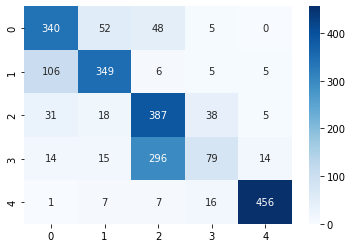

In [13]:
y_pred = cross_val_predict(clf_svm,X_test,Y_test,cv=5)

#print the performance metrics (precison, recall and f1 score) on testing dataset for all class
print("Testing metrics\n",classification_report(Y_test, y_pred,target_names=['Eyes opened','Eyes closed','Healthy Area','Tumor Area','Seizure']))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, range(5), range(5))
sn.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')

## LSTM model for multi class classification

In [14]:
## Now let us try recurrent neural network (LSTM) for seizure detection and classification

In [15]:
df = shuffle(df)
X1 = df.iloc[:,1:177].values
Y1 = df.iloc[:,178].values

# normalize the dataset
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)
from keras.utils import to_categorical
Y1 = to_categorical(Y1)

# split the training (60%) validation (20%) and testing (20%) dataset
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2)
X1_train, X1_val, Y1_train, Y1_val = train_test_split(X1_train, Y1_train, test_size=0.25, random_state=1)

X1_train = np.reshape(X1_train, (X1_train.shape[0],1,X1.shape[1]))
X1_test = np.reshape(X1_test, (X1_test.shape[0],1,X1.shape[1]))
X1_val = np.reshape(X1_val, (X1_val.shape[0],1,X1.shape[1]))

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.optimizers import SGD
from keras_tuner import RandomSearch

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

In [17]:
#  to find the the optimal number of LSTM layers we used hp.int() in a for loop, which could take value 1 to 4.
# To avoid overfitting the neural network, we add a dropout layer and to find the right drop out we used hp.Float().
# and defined the the final layer as dense layer
#After defining the hyper-parameters we compiled the model with RMSprop optimizer,
# binary cross-Entropy loss function, and metric and return that model

# we used early stopping to Stop the training when a monitored metric has stopped improving.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=16,max_value=512,step=16),return_sequences=True, input_shape=(X1_train.shape[1],X1_train.shape[2])))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=16,max_value=512,step=16),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=16,max_value=512,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.9,step=0.1)))
    model.add(Dense(Y1_train.shape[1], activation=hp.Choice('dense_activation',values=['relu', 'sigmoid','softmax'])))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                  loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [18]:
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='H:\Final_project\Save_model\Muticlass',
                     project_name='Best_model')

INFO:tensorflow:Reloading Oracle from existing project H:\Final_project\Save_model\Muticlass\Best_model\oracle.json
INFO:tensorflow:Reloading Tuner from H:\Final_project\Save_model\Muticlass\Best_model\tuner0.json


In [19]:
tuner.search(
        x=X1_train,
        y=Y1_train,
        epochs=50,
        validation_data=(X1_val,Y1_val),
         callbacks=[stop_early]
        )

INFO:tensorflow:Oracle triggered exit


In [20]:
tuner.results_summary()

Results summary
Results in H:\Final_project\Save_model\Muticlass\Best_model
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 464
n_layers: 1
lstm_0_units: 288
layer_2_neurons: 192
Dropout_rate: 0.8
dense_activation: softmax
learning_rate: 0.001
lstm_1_units: 304
lstm_2_units: 224
lstm_3_units: 96
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Score: 0.6926087141036987
Trial summary
Hyperparameters:
input_unit: 464
n_layers: 1
lstm_0_units: 288
layer_2_neurons: 192
Dropout_rate: 0.8
dense_activation: softmax
learning_rate: 0.001
lstm_1_units: 304
lstm_2_units: 224
lstm_3_units: 96
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0038
Score: 0.6830434799194336
Trial summary
Hyperparameters:
input_unit: 368
n_layers: 3
lstm_0_units: 288
layer_2_neurons: 224
Dropout_rate: 0.4
dense_activation: softmax
learning_rate: 0.001
lstm_1_units: 256
lstm_2_units: 368
lstm_3_units: 448
tuner/epochs:

In [21]:
best_model = tuner.get_best_models()[0]
best_model.build(X1_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 464)            1189696   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 288)            867456    
_________________________________________________________________
lstm_2 (LSTM)                (None, 192)               369408    
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 965       
Total params: 2,427,525
Trainable params: 2,427,525
Non-trainable params: 0
_________________________________________________________________


In [22]:
best_model.fit(X1_train,Y1_train,epochs=50,
        validation_data=(X1_val,Y1_val),
        batch_size = 16,
        callbacks=[stop_early])

Epoch 1/50
432/432 [==============================] - 9s 21ms/step - loss: 0.6771 - accuracy: 0.7190 - val_loss: 0.6081 - val_accuracy: 0.7170
Epoch 2/50
432/432 [==============================] - 8s 19ms/step - loss: 0.5970 - accuracy: 0.7455 - val_loss: 0.6365 - val_accuracy: 0.7170
Epoch 3/50
432/432 [==============================] - 8s 19ms/step - loss: 0.5476 - accuracy: 0.7661 - val_loss: 0.7937 - val_accuracy: 0.6939
Epoch 4/50
432/432 [==============================] - 8s 18ms/step - loss: 0.5053 - accuracy: 0.7858 - val_loss: 0.6806 - val_accuracy: 0.7222
Epoch 5/50
432/432 [==============================] - 8s 19ms/step - loss: 0.4557 - accuracy: 0.8106 - val_loss: 0.7442 - val_accuracy: 0.7196
Epoch 6/50
432/432 [==============================] - 8s 19ms/step - loss: 0.4138 - accuracy: 0.8190 - val_loss: 0.7501 - val_accuracy: 0.7230


              precision    recall  f1-score   support

 Eyes opened       0.69      0.74      0.71       481
 Eyes closed       0.79      0.84      0.82       464
Healthy Area       0.62      0.47      0.54       469
  Tumor Area       0.56      0.62      0.59       448
     Seizure       0.95      0.97      0.96       438

    accuracy                           0.72      2300
   macro avg       0.72      0.73      0.72      2300
weighted avg       0.72      0.72      0.72      2300



<AxesSubplot:>

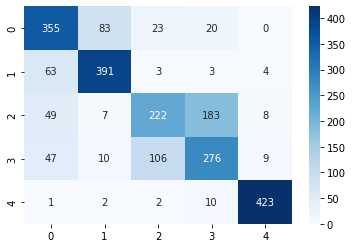

In [23]:
Y_pred = best_model.predict(X1_test)

# calculate the performance metrics (precision, recall and f1 score)
print(classification_report(Y1_test.argmax(axis=1), Y_pred.argmax(axis=1), target_names=['Eyes opened','Eyes closed','Healthy Area','Tumor Area','Seizure']))
cm = confusion_matrix(Y1_test.argmax(axis=1), Y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, range(5), range(5))
sn.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')

In [ ]:
## ROC curves of all mode

Instructions for updating:
Please use `model.predict()` instead.


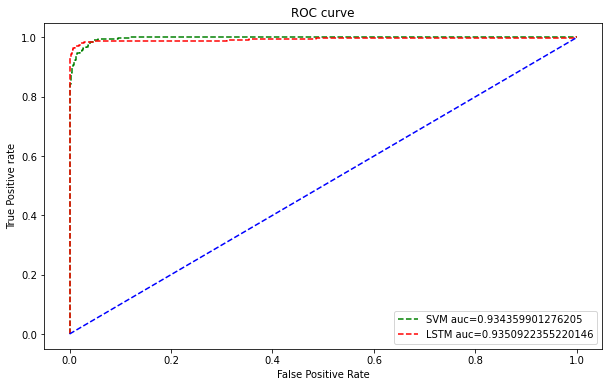

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

pred_prob1 = clf_svm.predict_proba(X_test)
pred_prob2 = best_model.predict_proba(X1_test)

Y_bin1 = label_binarize(Y_test, classes=[0,1, 2,3,4])
Y_bin2 = label_binarize(Y1_test, classes=[0,1, 2,3,4])


auc1 = metrics.roc_auc_score(Y_test, pred_prob1, multi_class='ovr')
auc2 = metrics.roc_auc_score(Y1_test, pred_prob2,multi_class='ovr' )


plt.figure(1, figsize=(10, 6))
plt.clf()




for j in range(0,np.size(Y_bin1,1)):
    fpr1, tpr1, T1 = roc_curve(Y_bin1[:,j], pred_prob1[:,j])
    fpr2, tpr2, T2 = roc_curve(Y_bin2[:,j], pred_prob2[:,j])
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label="SVM auc="+str(auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='red', label="LSTM auc="+str(auc2))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
